# Imports

In [900]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score, log_loss, precision_score, recall_score, f1_score, accuracy_score, hamming_loss
import random
import tensorflow as tf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, MinMaxScaler
import seaborn as sns


# Descargar dataset

In [864]:
#!kaggle datasets download ashpalsingh1525/imdb-movies-dataset -p . --unzip
df = pd.read_csv("imdb_movies.csv")

In [865]:
df.head(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


# Tratar dataset

## Nulos

In [866]:
df.isnull().sum()[df.isnull().sum() > 0]

genre    85
crew     56
dtype: int64

Contiene pocos nulos en proporcion a todas las filas sin nulos, vamos a eliminarlos

In [867]:
df = df.dropna()

In [868]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10052 non-null  object 
 1   date_x      10052 non-null  object 
 2   score       10052 non-null  float64
 3   genre       10052 non-null  object 
 4   overview    10052 non-null  object 
 5   crew        10052 non-null  object 
 6   orig_title  10052 non-null  object 
 7   status      10052 non-null  object 
 8   orig_lang   10052 non-null  object 
 9   budget_x    10052 non-null  float64
 10  revenue     10052 non-null  float64
 11  country     10052 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1020.9+ KB


## Vamos a aplicar MultiLabelEncoder a los generos

In [869]:
df['genre'] = df['genre'].apply(lambda x: x.split(','))
df.head(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"[Animation, Adventure, Family, Fantasy, Co...","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"[Animation, Comedy, Family, Adventure, Fan...","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [870]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre'])  # Variable objetivo (género binarizado)

# Crear el DataFrame de los géneros en formato binario
y_df = pd.DataFrame(y, columns=mlb.classes_)

In [871]:
df = df.drop(columns=["genre"])
y_df.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Fecha (Object &rarr; Int) (segundos desde 1970)

In [872]:
df['date_x'] = df['date_x'].str.strip()
df['date_x'] = pd.to_datetime(df['date_x'], format='%m/%d/%Y')
df['date_x'] = df['date_x'].astype('int64') // 10**9

In [873]:
df["date_x"].head(5)

0    1677715200
1    1671062400
2    1680652800
3    1672876800
4    1679011200
Name: date_x, dtype: int64

### Ahora vamos a normalizarlo

In [874]:
scaler = MinMaxScaler()
df["date_x"] = scaler.fit_transform(df[["date_x"]])

### Vamos a convertir el texto de "overview" en una representacion numerica usando TF-IDF
<p style="color: red;">Descartado por no tener 10 odernadores de la NASA</p> 

In [875]:
df = df.drop(columns=["overview"])
df = df.drop(columns=["crew"])

### Vamos a normalizar score

In [876]:
df["score"].min(), df["score"].max()

(0.0, 100.0)

Como los valores van de 0 a 100, nos basta con dividir entre 100

In [877]:
df['score'] = df['score'] / 100

### Vamos a eliminar las columnas identificativas

In [878]:
df = df.drop(columns=["names", "orig_title"])

### Columna status

In [879]:
df["status"].unique()

array([' Released', ' Post Production', ' In Production'], dtype=object)

Esta columna muestra el estado actual de la pelicula: released, post production e in progress, vamos a comprobar su correlacion con los generos generos

In [880]:
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])
correlation_matrix = y_df.corrwith(df["status_encoded"])
print(correlation_matrix.sort_values(ascending=False))


 Animation          0.015551
Comedy              0.013052
Fantasy             0.010410
 Music              0.008955
Documentary         0.008470
 TV Movie           0.008445
Mystery             0.006607
 Romance            0.006494
War                 0.005623
Music               0.005586
Western             0.005398
Science Fiction     0.005238
 Western            0.004876
History             0.004339
TV Movie            0.003783
 Documentary        0.003065
Romance             0.002516
 Fantasy            0.002149
Thriller            0.002027
 War                0.001658
 History            0.001417
Action              0.000899
Family              0.000038
 Comedy            -0.001938
 Family            -0.002082
Animation          -0.002638
 Action            -0.003013
Crime              -0.004394
 Horror            -0.005829
 Mystery           -0.006166
Horror             -0.008814
 Adventure         -0.009900
 Drama             -0.011856
Adventure          -0.011943
 Science Ficti

Como vemos no tiene correlacion alguna con los generos, asi que podemos prescindir de ella

In [881]:
df = df.drop(columns=["status_encoded", "status"])

In [882]:
df.head(5)

,date_x,score,orig_lang,budget_x,revenue,country
0,0.993100,0.73,English,75000000.0,2.716167e+08,AU
1,0.991353,0.78,English,460000000.0,2.316795e+09,AU
2,0.993872,0.76,English,100000000.0,7.244590e+08,AU
3,0.991829,0.70,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,0.993441,0.61,English,77000000.0,3.409420e+08,US


### Vamos a tratar revenue

In [883]:
df["revenue"].describe()

count    1.005200e+04
mean     2.512049e+08
std      2.765495e+08
min      0.000000e+00
25%      2.768781e+07
50%      1.493288e+08
75%      4.161578e+08
max      2.923706e+09
Name: revenue, dtype: float64

Vamos a reducir la magnitus de los numeros transformando los numeros a tantos de millones

In [884]:
df["revenue(M)"] = (df["revenue"] / 1e6)
df = df.drop(columns=["revenue"])
df["revenue(M)"] = df["revenue(M)"].astype(float)
df["revenue(M)"].describe()

count    10052.000000
mean       251.204924
std        276.549495
min          0.000000
25%         27.687812
50%        149.328804
75%        416.157755
max       2923.706026
Name: revenue(M), dtype: float64

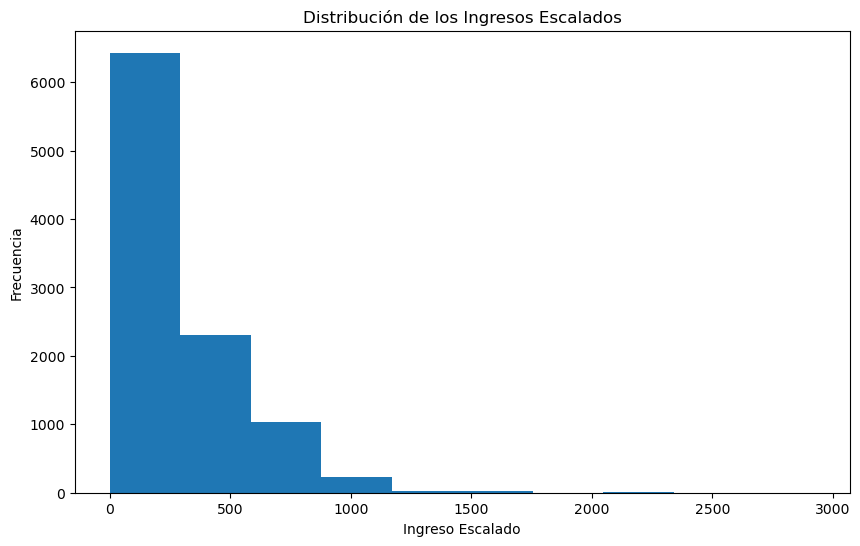

In [885]:
plt.figure(figsize=(10,6))
plt.hist(df['revenue(M)'])
plt.title('Distribución de los Ingresos Escalados')
plt.xlabel('Ingreso Escalado')
plt.ylabel('Frecuencia')
plt.show()

Aplicamos log1p de numpy para comprimir los valores mas altos y expandir los mas bajos, haciendo que la distribucion sea mas equilibrada

Asi aseguramos que no haya valores demasiado grandes que dominen el modelo

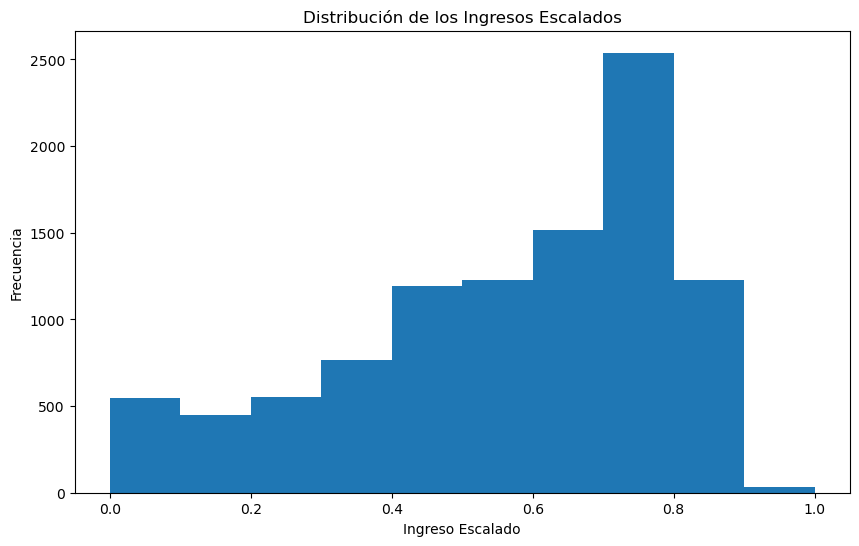

In [886]:
df["revenue(M)"] = np.log1p(df["revenue(M)"])
df["revenue(M)"] = scaler.fit_transform(df[["revenue(M)"]])
plt.figure(figsize=(10,6))
plt.hist(df['revenue(M)'])
plt.title('Distribución de los Ingresos Escalados')
plt.xlabel('Ingreso Escalado')
plt.ylabel('Frecuencia')
plt.show()

### Vamos a tratar budget_x

In [887]:
df["budget_x"].describe()

count    1.005200e+04
mean     6.412528e+07
std      5.665852e+07
min      1.000000e+00
25%      1.439763e+07
50%      5.000000e+07
75%      1.040000e+08
max      4.600000e+08
Name: budget_x, dtype: float64

Vamos a reducir la magnitus de los numeros transformando los numeros a tantos de millones

In [888]:
df["budget_x(M)"] = (df["budget_x"] / 1e6)
df = df.drop(columns=["budget_x"])
df["budget_x(M)"] = df["budget_x(M)"].astype(float)
df["budget_x(M)"].describe()

count    10052.000000
mean        64.125277
std         56.658517
min          0.000001
25%         14.397627
50%         50.000000
75%        104.000000
max        460.000000
Name: budget_x(M), dtype: float64

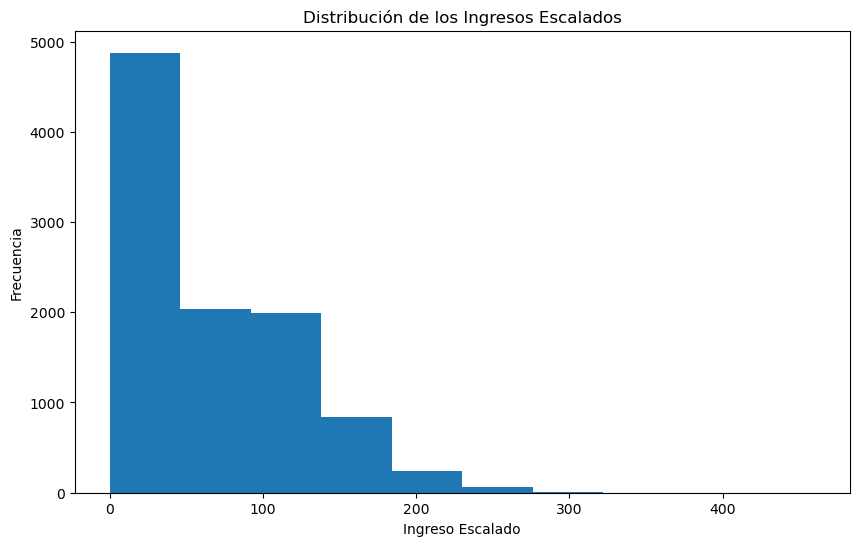

In [889]:
plt.figure(figsize=(10,6))
plt.hist(df['budget_x(M)'])
plt.title('Distribución de los Ingresos Escalados')
plt.xlabel('Ingreso Escalado')
plt.ylabel('Frecuencia')
plt.show()

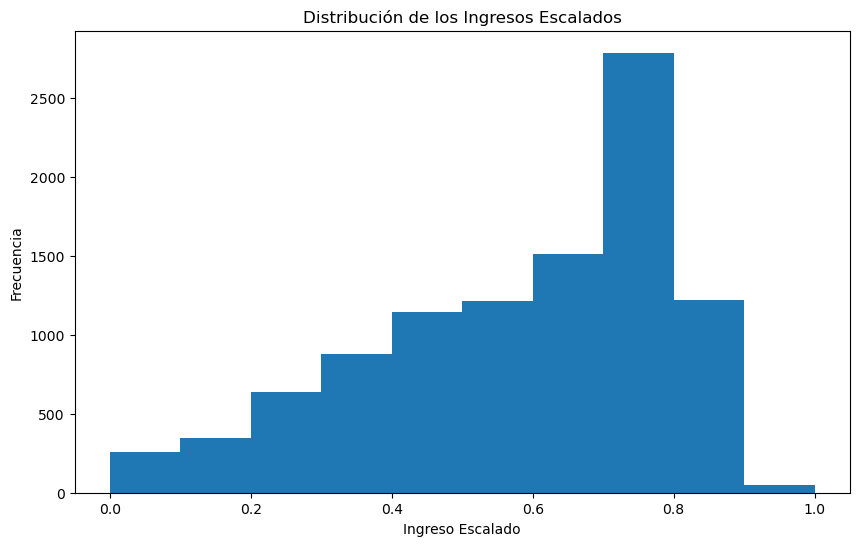

In [890]:
df["budget_x(M)"] = np.log1p(df["budget_x(M)"])
df["budget_x(M)"] = scaler.fit_transform(df[["budget_x(M)"]])
plt.figure(figsize=(10,6))
plt.hist(df['budget_x(M)'])
plt.title('Distribución de los Ingresos Escalados')
plt.xlabel('Ingreso Escalado')
plt.ylabel('Frecuencia')
plt.show()

# Aplicamos LabelEncoding a la region y el idioma original

In [891]:
df["country"] = le.fit_transform(df["country"])
df["orig_lang"] = le.fit_transform(df["orig_lang"])

In [892]:
df.head(2)

,date_x,score,orig_lang,country,revenue(M),budget_x(M)
0,0.993100,0.73,12,2,0.702682,0.70609
1,0.991353,0.78,12,2,0.970858,1.00000


In [893]:
X = df
y = y_df

In [894]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

# Crear el modelo
modelo = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dense(64, activation="relu"),  # Capa oculta 2
    Dense(38, activation="softmax")  # Capa de salida (3 clases → Softmax)
])

# Compilar el modelo
modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50


c:\Users\marco\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1006/1006 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0428 - loss: 874.5634 - val_accuracy: 0.0000e+00 - val_loss: 9826.6689
Epoch 2/50
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0547 - loss: 17737.0859 - val_accuracy: 0.0656 - val_loss: 51515.0898
Epoch 3/50
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0408 - loss: 62621.0078 - val_accuracy: 0.0000e+00 - val_loss: 117420.0391
Epoch 4/50
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0445 - loss: 132752.2188 - val_accuracy: 0.0000e+00 - val_loss: 212032.4688
Epoch 5/50
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0496 - loss: 235065.5938 - val_accuracy: 0.0000e+00 - val_loss: 346212.7188
Epoch 6/50
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0443 - loss: 363887.6250 - val_accuracy: 0.0000e+00 - val_loss: 495955.1562
Epoch 7/50
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0401 - loss: 530962.0625 - val_accuracy: 0.0000e+00 - val_loss: 715058.9375
Epoch 8/50
1006

In [901]:
# Realizar las predicciones
y_pred_prob = modelo.predict(X_test)

# Convertir las probabilidades a etiquetas binarias (0 o 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculo de las métricas
subset_accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='samples')
recall = recall_score(y_test, y_pred, average='samples')
f1 = f1_score(y_test, y_pred, average='samples')

print(f"Subset Accuracy: {subset_accuracy:.2f}")
print(f"Hamming Loss: {hamming}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Subset Accuracy: 0.05
Hamming Loss: 0.08560810280300453
Precision: 0.17255096966683242
Recall: 0.10175700314934526
F1 Score: 0.12148421775472994


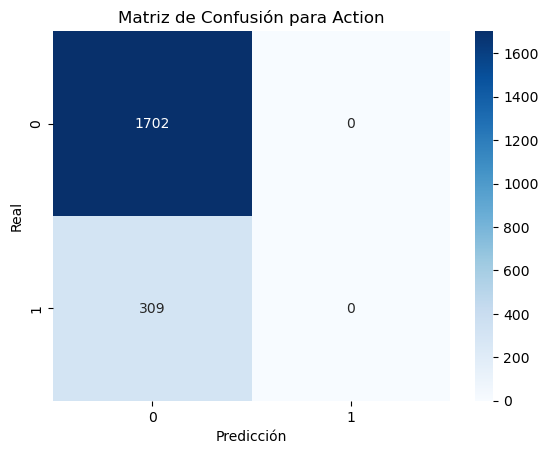

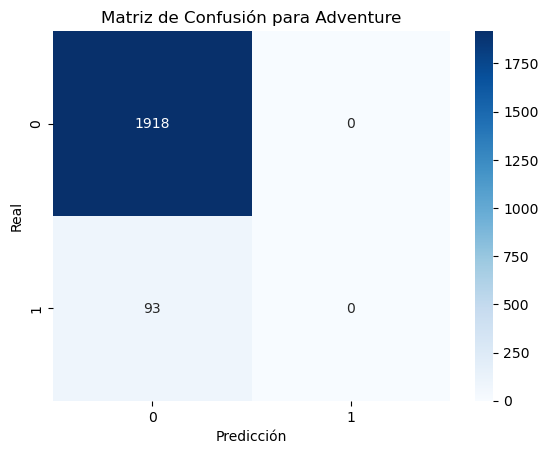

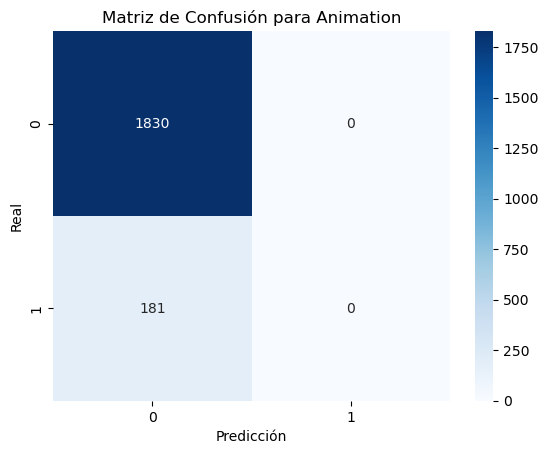

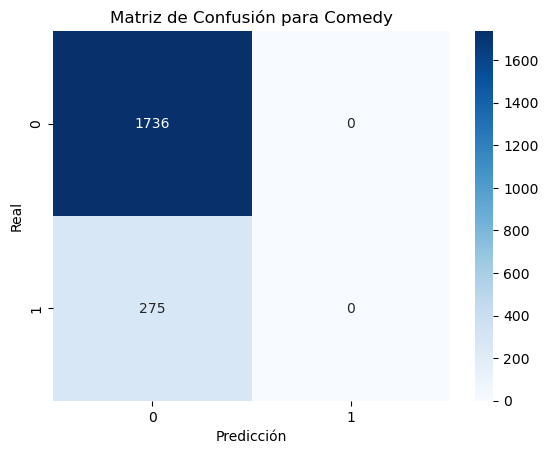

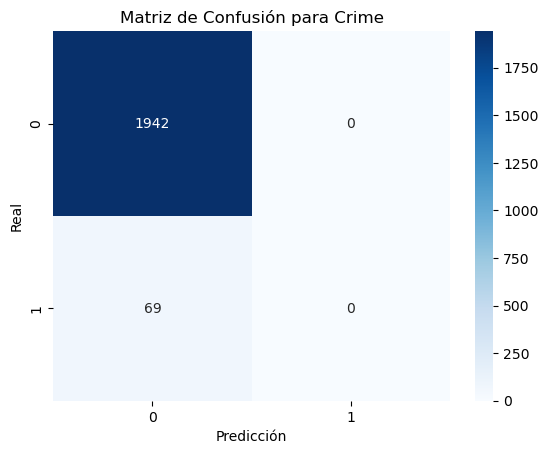

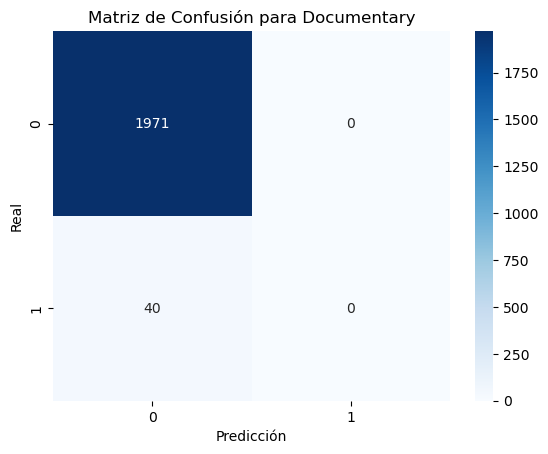

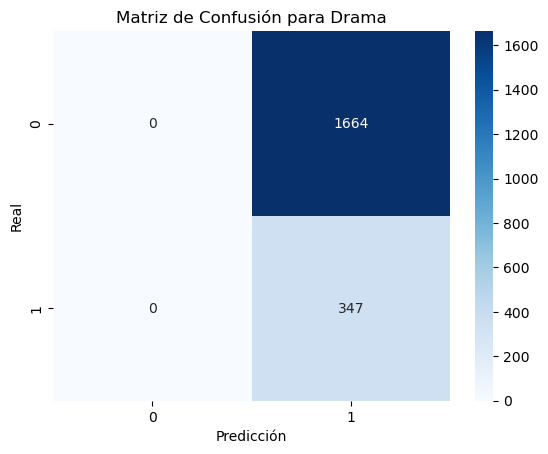

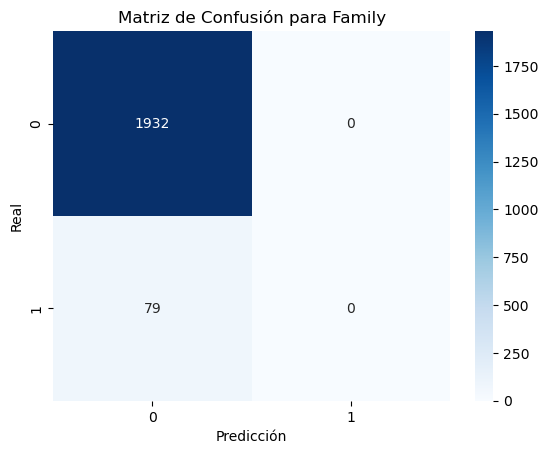

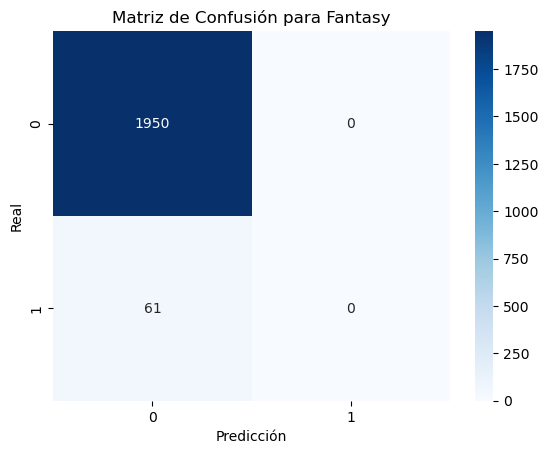

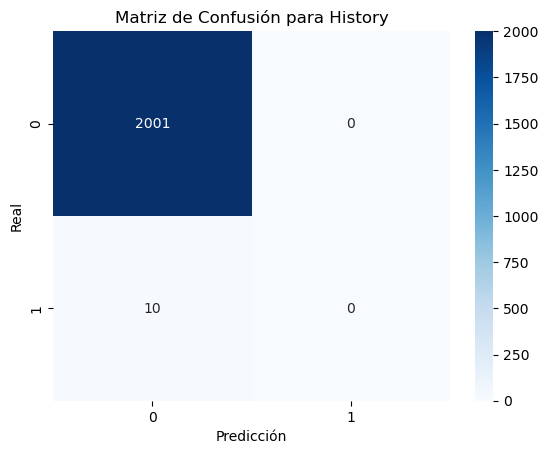

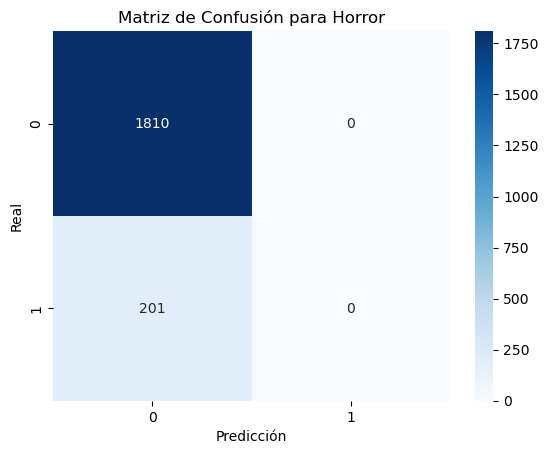

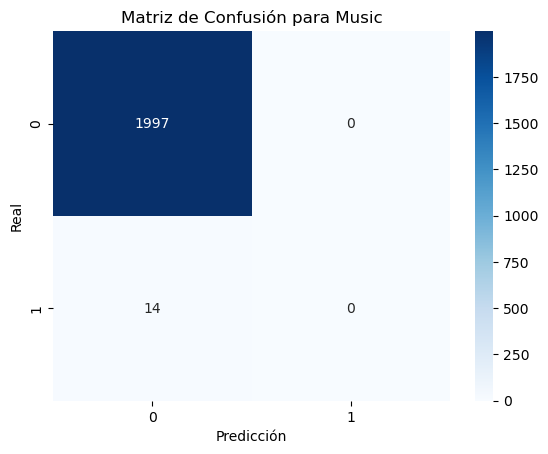

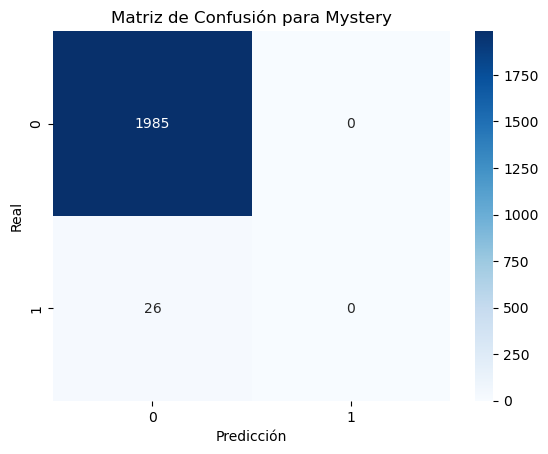

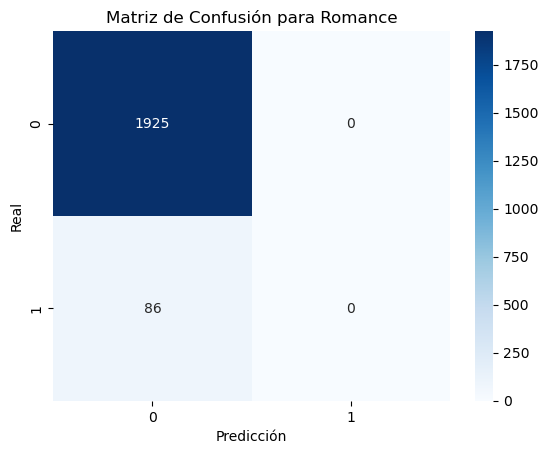

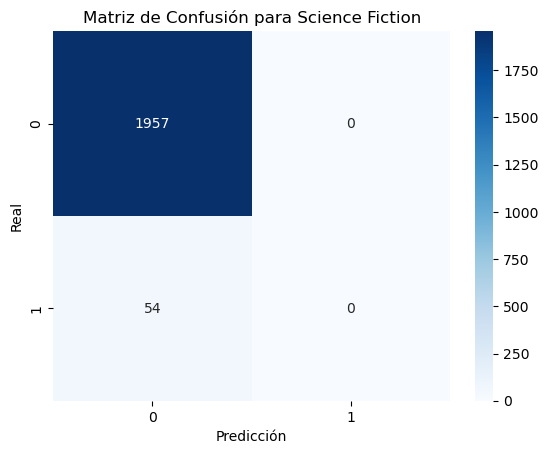

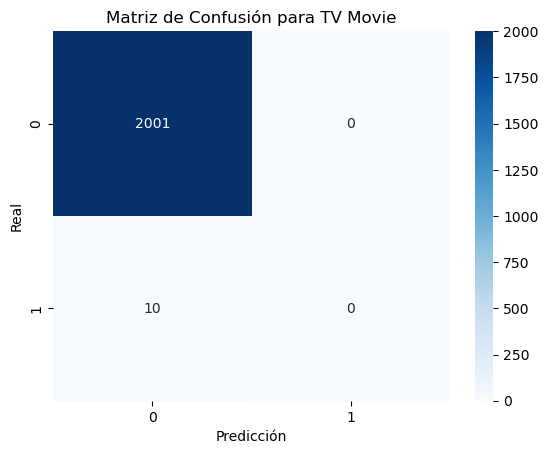

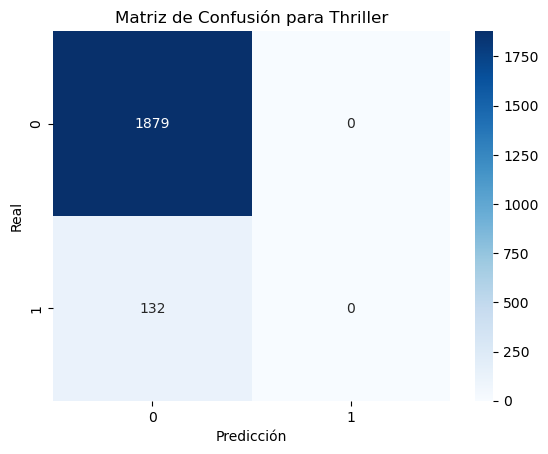

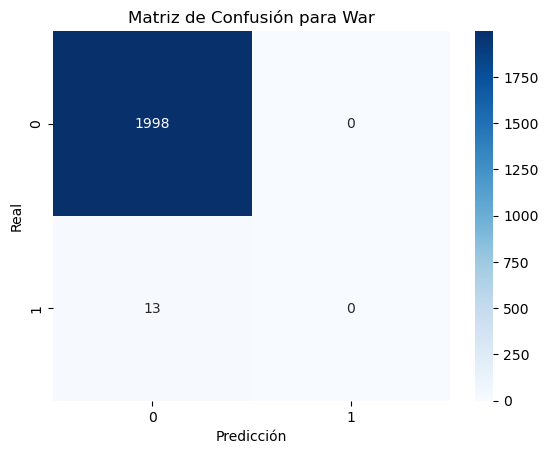

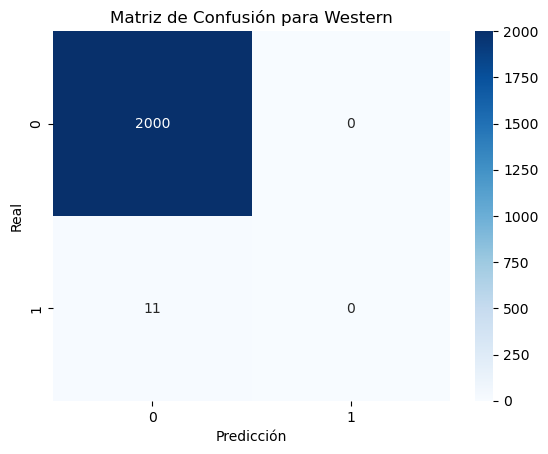

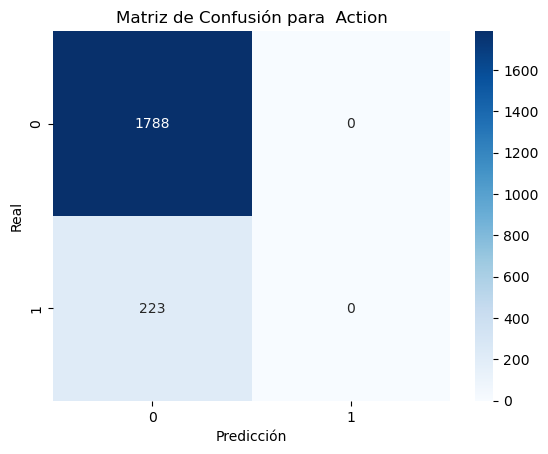

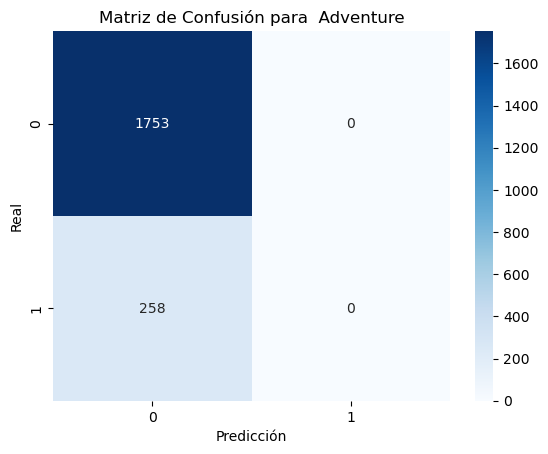

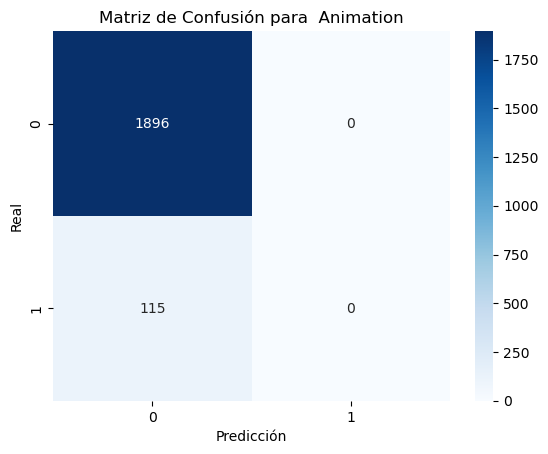

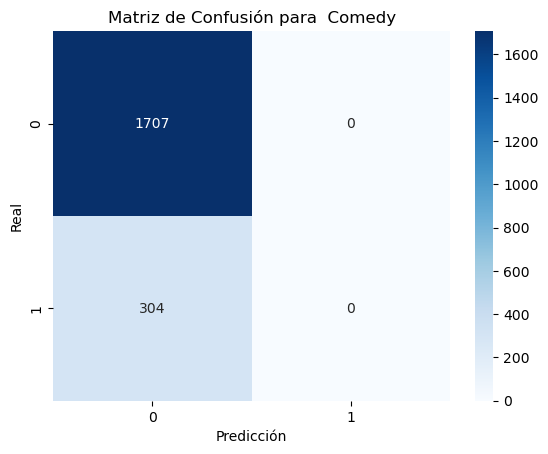

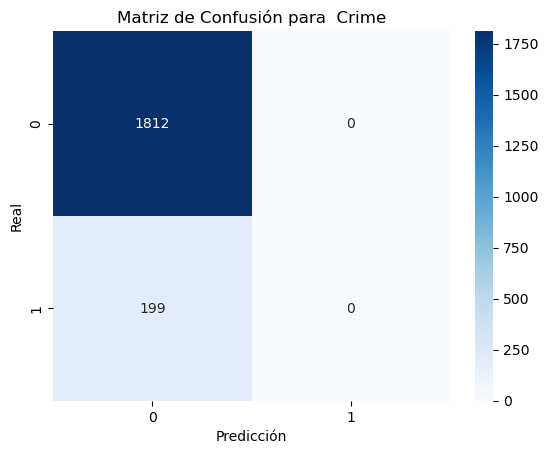

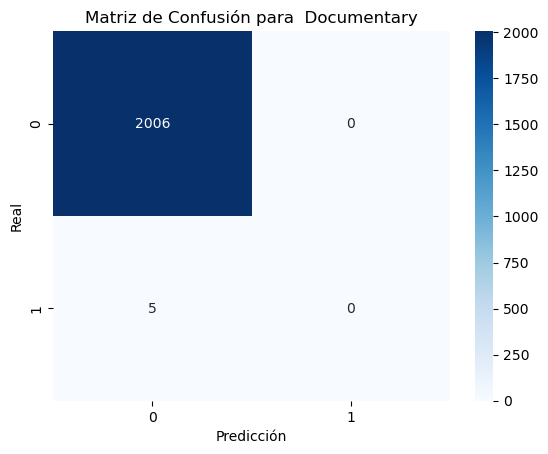

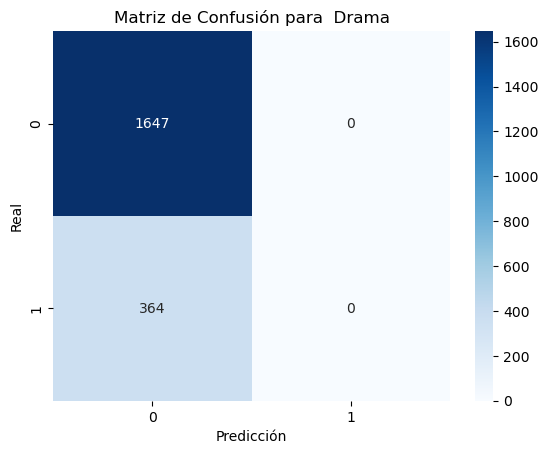

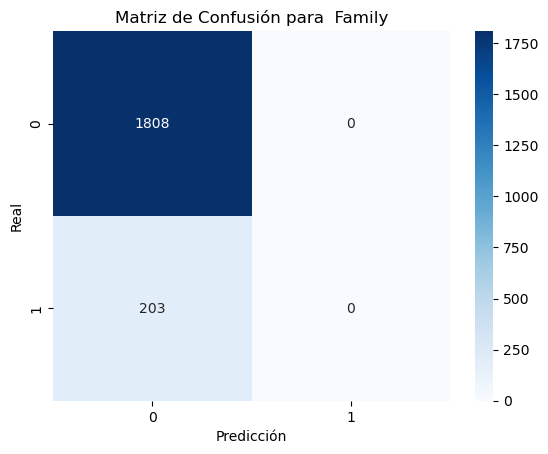

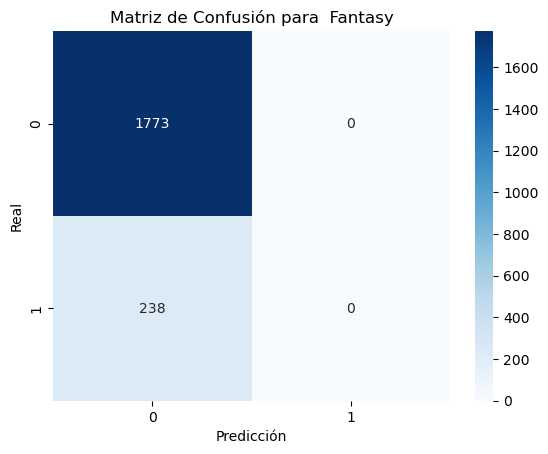

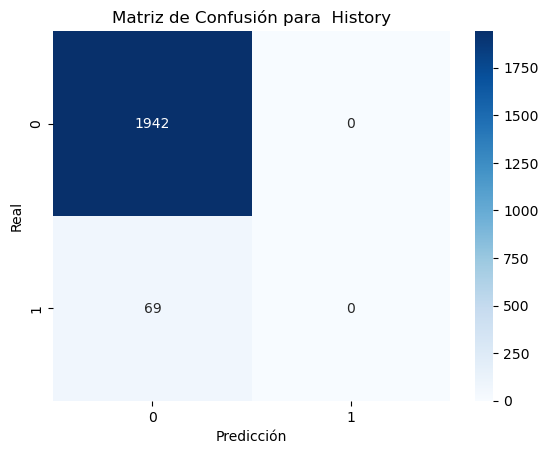

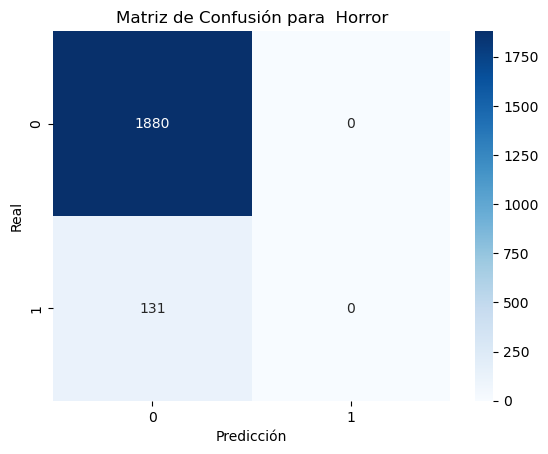

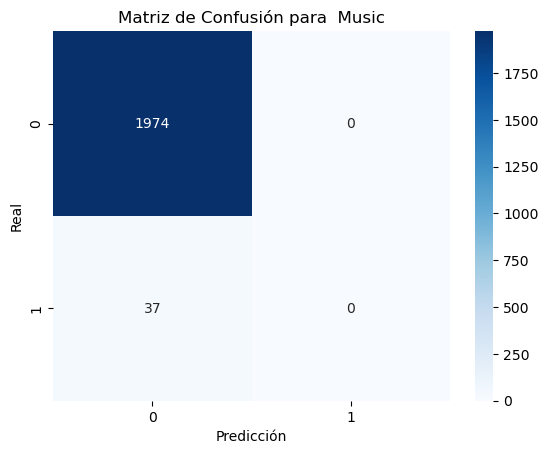

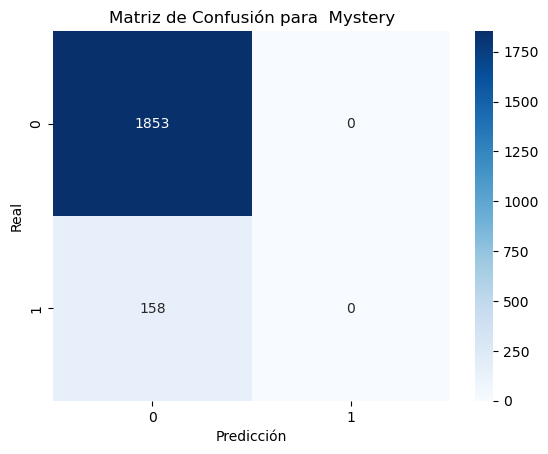

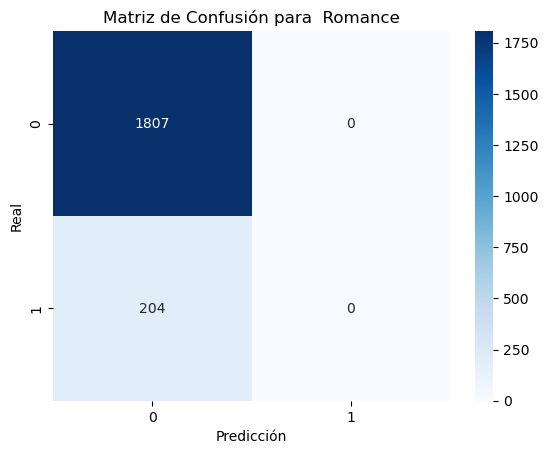

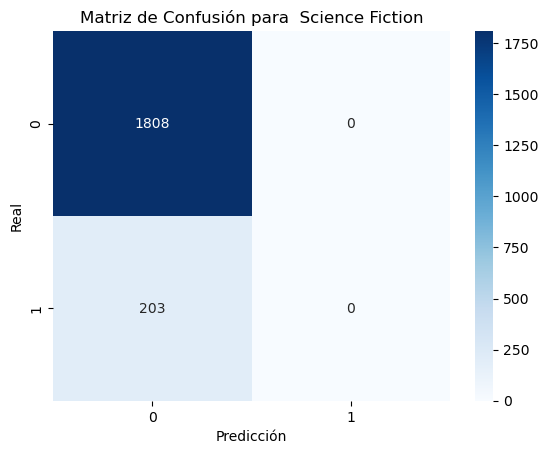

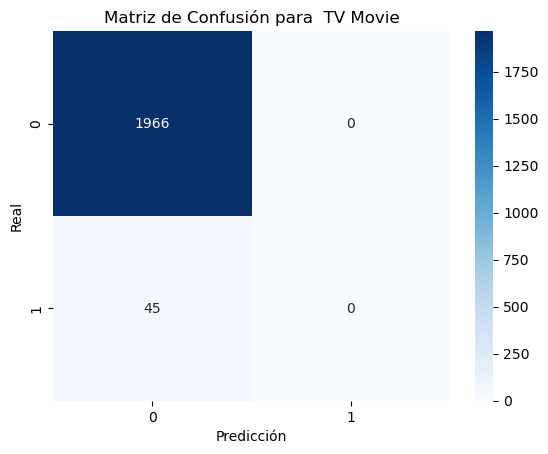

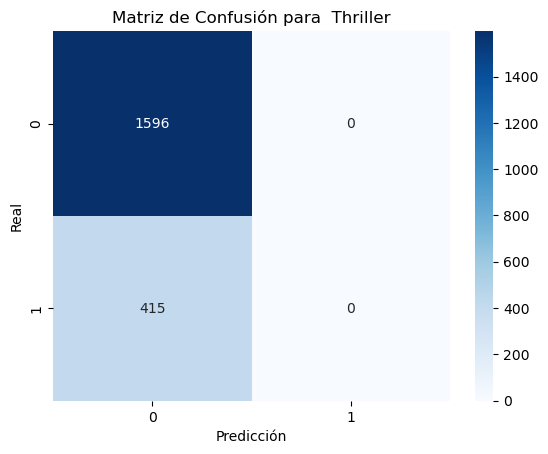

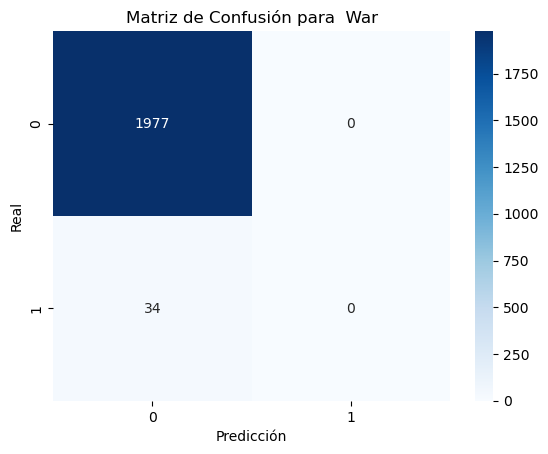

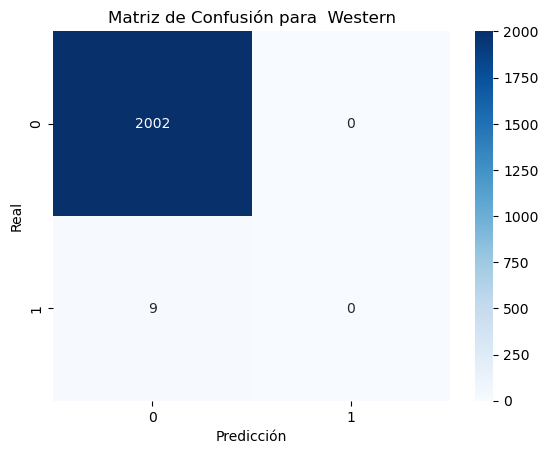

In [902]:
for i, label in enumerate(y.columns):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Matriz de Confusión para {label}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()